In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_titanic = pd.read_excel("titanic.xlsx")
# Not using this one anymore.

In [3]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df_titanic.shape

(418, 12)

In [9]:
df_titanic["Gender"].value_counts()

Gender
male      266
female    152
Name: count, dtype: int64

# Data Visualization

In [25]:
df_titanic1

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
df_titanic1['died'] = 1 - df_titanic["Survived"]

In [29]:
df_titanic1[df_titanic1["Gender"] == "male"]["died"].sum()

164.0

<Axes: xlabel='Gender'>

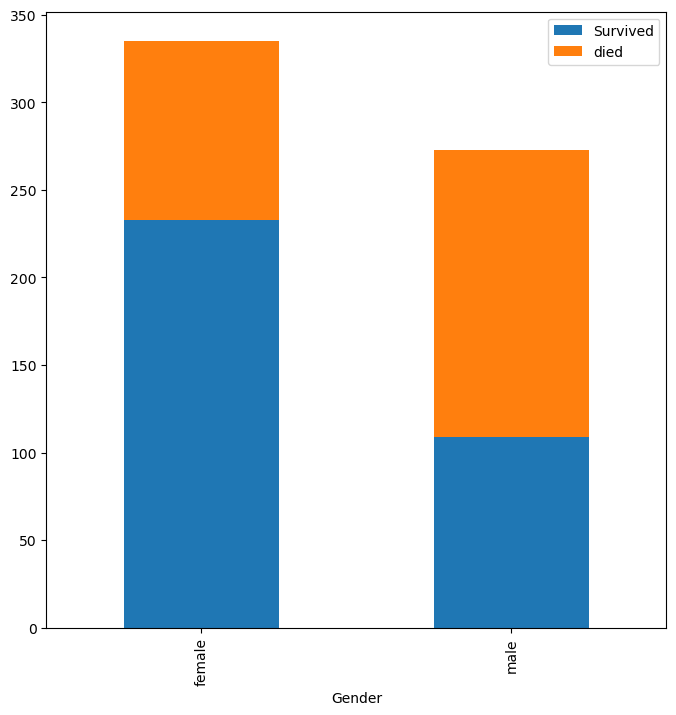

In [31]:
df_titanic1.groupby("Gender").agg({"Survived": "sum",
                                  "died" : "sum"}).plot(kind = 'bar', 
                                                        figsize = (8,8),
                                                        stacked = True)

In [33]:
df_titanic1 = pd.read_csv('titanic.csv')

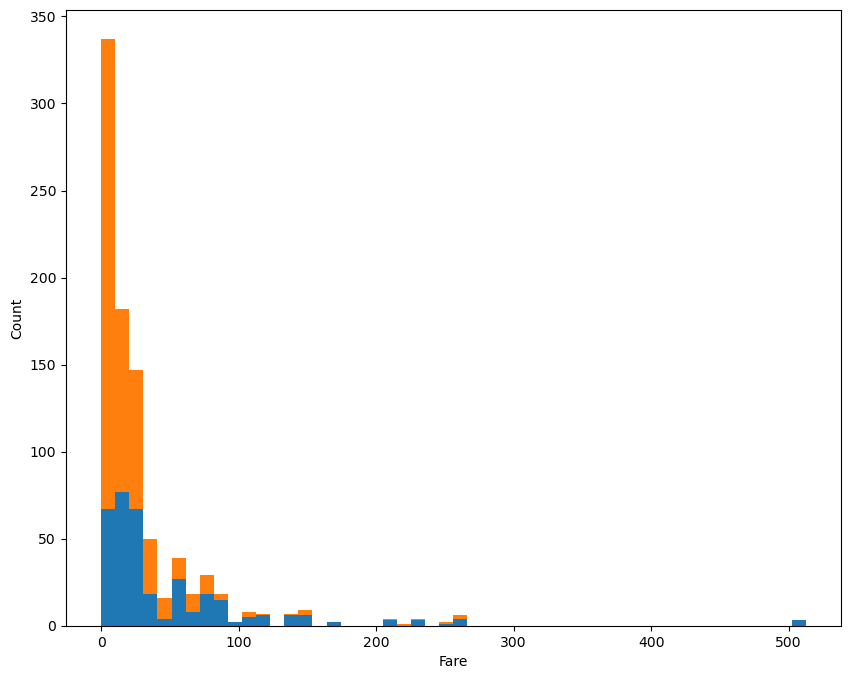

In [35]:
figure = plt.figure(figsize = (10,8))
plt.hist([df_titanic1[df_titanic1["Survived"] == 1]["Fare"],
         df_titanic1[df_titanic1["Survived"] == 0]["Fare"]],
         stacked=True,
         bins = 50,
         label = ["Survived", "Dead"])
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

## Preprocessing

In [37]:
#Drop the columns that are not relevant for the modeling purpose. 
# define a list to drop multiple columns.
df = df_titanic1.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1)

In [39]:
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [41]:
df.isnull().sum()

Survived      0
Pclass        0
Gender        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [43]:
df["Gender"] = df["Gender"].map({"female":0, "male":1})

In [45]:
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,NaN,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [47]:
df["Gender"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Gender, Length: 891, dtype: int64

In [49]:
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [53]:
df["Embarked"] = df["Embarked"].map({ "S":0, "C":1, "Q":2, "nan":'NaN'})

In [55]:
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [57]:
mean_age_male = df[df["Gender"] == 1]["Age"].mean()
mean_age_female = df[df["Gender"] == 0]["Age"].mean()

In [59]:
mean_age_male

30.72664459161148

In [61]:
mean_age_female

27.915708812260537

In [63]:
# Imputation
df.loc[(df["Age"].isnull()) & (df["Gender"] == 1), "Age"] = mean_age_male
df.loc[(df["Age"].isnull()) & (df["Gender"] == 0), "Age"] = mean_age_female

In [65]:
df.isnull().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [67]:
df.dropna(inplace = True)

In [69]:
df.isnull().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [71]:
# So we need to normalize the data, we need to put the different ranges in the same range. 
# We can either do calculations or different imbedded parts in the code. 
# continous variables need to be normalized
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [73]:
#Standarization formula: ( One way) : 
df["Age"] = (((df["Age"] - min(df["Age"]))) / (max(df["Age"]) - min(df["Age"])))
df["Fare"] = (((df["Fare"] - min(df["Fare"]))) / (max(df["Fare"]) - min(df["Fare"])))


In [75]:
df.sample(10)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
123,1,2,0,0.403116,0,0,0.025374,0
761,0,3,1,0.509927,0,0,0.013907,0
768,0,3,1,0.380832,1,0,0.047138,2
755,1,2,1,0.003141,1,1,0.028302,0
247,1,2,0,0.296306,0,2,0.028302,0
158,0,3,1,0.380832,0,0,0.016908,0
77,0,3,1,0.380832,0,0,0.015713,0
16,0,3,1,0.019854,4,1,0.056848,2
363,0,3,1,0.434531,0,0,0.013761,0
563,0,3,1,0.380832,0,0,0.015713,0


In [77]:
df["Age"].describe()

count    889.000000
mean       0.367812
std        0.163124
min        0.000000
25%        0.271174
50%        0.371701
75%        0.434531
max        1.000000
Name: Age, dtype: float64

In [79]:
df.describe()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,0.367812,0.524184,0.382452,0.062649
std,0.486260,0.834700,0.477538,0.163124,1.103705,0.806761,0.097003
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.015412
50%,0.000000,3.000000,1.000000,0.371701,0.000000,0.000000,0.028213
75%,1.000000,3.000000,1.000000,0.434531,1.000000,0.000000,0.060508
max,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000



# Model


In [ ]:
#obj: Predict if a given observation survives or not. 

In [ ]:
# 1. Preprocessing -> Train (80% of data) - Test(20% of data) -> New Data(Deployment Part) = Model outputs the probability. 

In [81]:
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,0
1,1,1,0,0.472229,1,0,0.139136,1
2,1,3,0,0.321438,0,0,0.015469,0
3,1,1,0,0.434531,1,0,0.103644,0
4,0,3,1,0.434531,0,0,0.015713,0
...,...,...,...,...,...,...,...,...
886,0,2,1,0.334004,0,0,0.025374,0
887,1,1,0,0.233476,0,0,0.058556,0
888,0,3,0,0.345510,1,2,0.045771,0
889,1,1,1,0.321438,0,0,0.058556,1


In [83]:
# Logistic Regression: ( Classification) (Basic Model)
# Splitting the data for training and testing 
# the X is a predictive variable , the second part is for y. 
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(df.drop(["Survived"],axis = 1),
                                                   df["Survived"],
                                                   test_size = 0.2, 
                                                   random_state = 5) 

In [85]:
X_train

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
682,3,1,0.246042,0,0,0.018006,0
887,1,0,0.233476,0,0,0.058556,0
470,3,1,0.380832,0,0,0.014151,0
505,1,1,0.220910,1,0,0.212559,1
135,2,1,0.283740,0,0,0.029367,1
...,...,...,...,...,...,...,...
401,3,1,0.321438,0,0,0.015713,0
119,3,0,0.019854,4,2,0.061045,0
702,3,0,0.220910,0,1,0.028213,1
207,3,1,0.321438,0,0,0.036671,1


In [87]:
y_train


682    0
887    1
470    0
505    0
135    0
      ..
401    0
119    0
702    0
207    1
869    1
Name: Survived, Length: 711, dtype: int64

In [89]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [244]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_predict = log_model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [246]:
# checking to see how accurate it is
accuracy_score(y_test, y_predict)

0.8595505617977528

<Axes: >

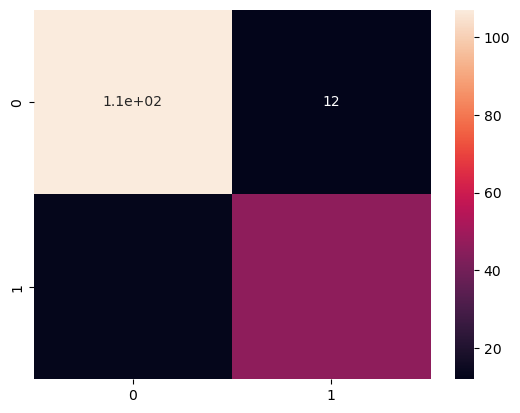

In [250]:
cm = confusion_matrix(y_test, y_predict)
cm
sns.heatmap(cm, annot = True,)